In [1]:
import pandas as pd
import seaborn as sns

sns.set(context='notebook', style='whitegrid', palette='dark')
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])

In [3]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [7]:
df.describe()
df.sample(10)

,population,profit
25,18.9450,22.63800
39,6.3534,5.49740
70,10.1360,6.67990
29,22.2030,24.14700
72,6.0062,1.27840
75,6.5479,0.29678
32,9.2482,12.13400
15,5.3794,3.51290
10,5.7107,3.25220
64,18.9590,17.05400


/Users/lushize/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


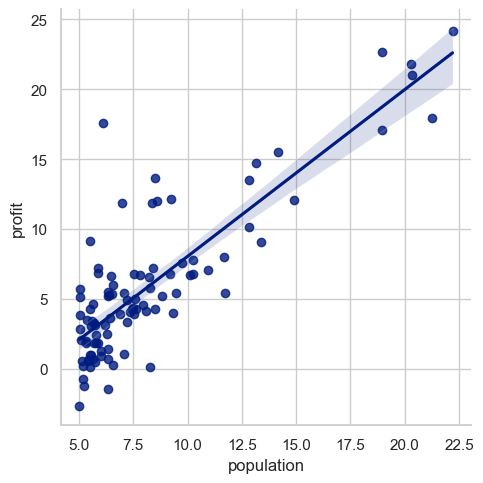

In [13]:
sns.lmplot(x='population', y='profit', data=df, fit_reg=True)
plt.show()

<Axes: xlabel='population', ylabel='profit'>

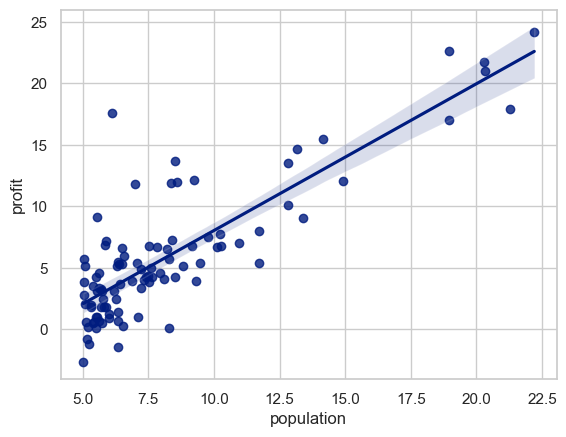

In [8]:
sns.regplot(x='population', y='profit', data=df)

<Axes: xlabel='population', ylabel='profit'>

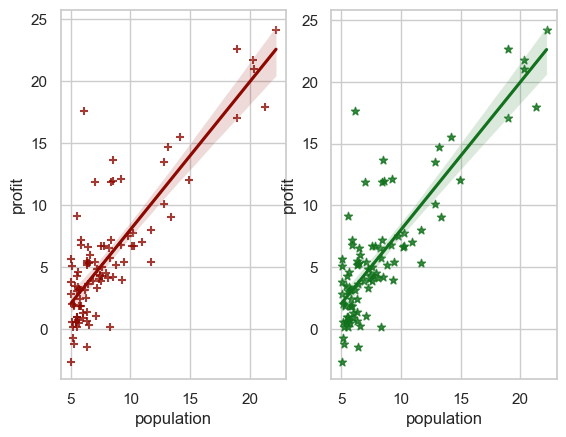

In [11]:
fig, axes = plt.subplots(1, 2)

sns.regplot(x='population', y='profit', data=df, color='r', marker='+', ax=axes[0])

sns.regplot(x='population', y='profit', data=df, color='g', marker='*', ax=axes[1])


In [20]:
def get_X(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)
    return np.array(data.iloc[:, :-1])


def get_y(df):  #读取标签
    return np.array(df.iloc[:, -1])


def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [21]:
data = df
X = get_X(df)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [24]:
theta = np.zeros(X.shape[1])
theta

array([0., 0.])

In [29]:
def lr_cost(theta, X, y):
    """
    计算代价函数
    :param theta: 
    :param X: 
    :param y: 
    :return: 
    """
    m = X.shape[0]

    inner = X @ theta - y
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)
    return cost

In [30]:
lr_cost(theta, X, y)

32.072733877455676

In [31]:
def gradient(theta, X, y):
    """
    计算梯度，偏导数J
    :param theta: 
    :param X: 
    :param y: 
    :return: 
    """
    m = X.shape[0]
    inner = X.T @ (X @ theta - y)
    return inner / m

In [32]:
def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
    """
    
    :param theta: 系数
    :param X: 特征值
    :param y: 
    :param epoch: 迭代次数
    :param alpha: 学习率
    :return: 
    """
    cost_data = [lr_cost(theta, X, y)]
    _theta = theta.copy()

    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_cost(_theta, X, y))
    return _theta, cost_data

In [33]:
epoch = 500  # 迭代次数
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)
final_theta

array([-2.28286727,  1.03099898])

In [34]:
cost_data

[32.072733877455676,
 6.737190464870011,
 5.931593568604956,
 5.901154707081388,
 5.895228586444221,
 5.89009494311733,
 5.885004158443647,
 5.8799324804914175,
 5.874879094762575,
 5.869843911806389,
 5.8648268653129305,
 5.859827889932181,
 5.85484692057229,
 5.849883892376588,
 5.844938740722034,
 5.840011401218359,
 5.835101809707226,
 5.830209902261386,
 5.825335615183862,
 5.820478885007099,
 5.815639648492152,
 5.81081784262787,
 5.806013404630044,
 5.801226271940628,
 5.796456382226899,
 5.791703673380653,
 5.786968083517397,
 5.782249550975539,
 5.777548014315598,
 5.77286341231938,
 5.768195683989212,
 5.763544768547119,
 5.758910605434049,
 5.754293134309077,
 5.749692295048626,
 5.745108027745684,
 5.740540272709011,
 5.73598897046238,
 5.731454061743792,
 5.726935487504699,
 5.722433188909257,
 5.717947107333529,
 5.713477184364749,
 5.709023361800547,
 5.7045855816482,
 5.700163786123856,
 5.695757917651815,
 5.691367918863752,
 5.68699373259798,
 5.682635301898707,
 5.67

In [35]:
lr_cost(final_theta, X, y)

4.713809531116865

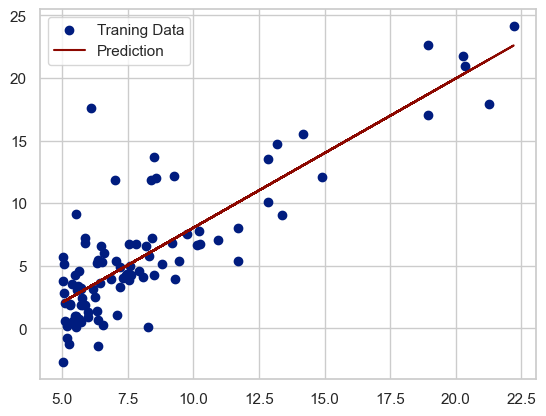

In [37]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X, y)

x = X[:, 1]
f = model.predict(X).flatten()

plt.scatter(X[:, 1], y, label='Traning Data')
plt.plot(x, f, 'r', label='Prediction')
plt.legend(loc=2)
plt.show()

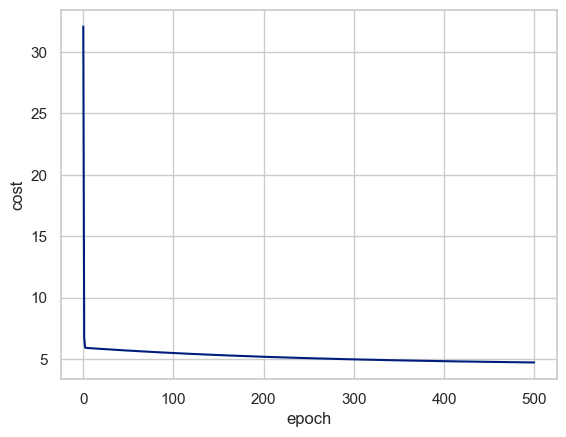

In [38]:
ax = sns.lineplot(y=cost_data, x=np.arange(epoch + 1))
ax.set_xlabel('epoch')
ax.set_ylabel('cost')
plt.show()

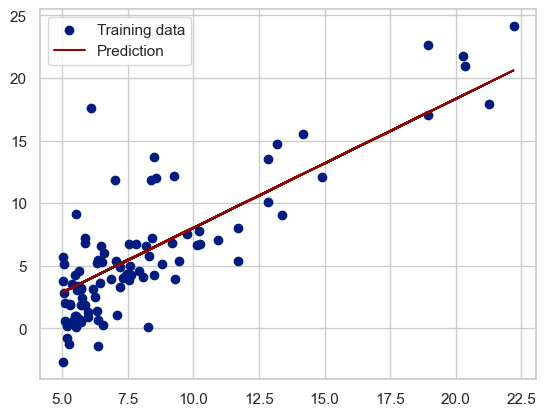

In [39]:
b = final_theta[0]  # intercept，Y轴上的截距
m = final_theta[1]  # slope，斜率

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population * m + b, 'r', label="Prediction")
plt.legend(loc=2)
plt.show()

In [41]:
# 学习率
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate((base, base * 3)))
print(candidate)

[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


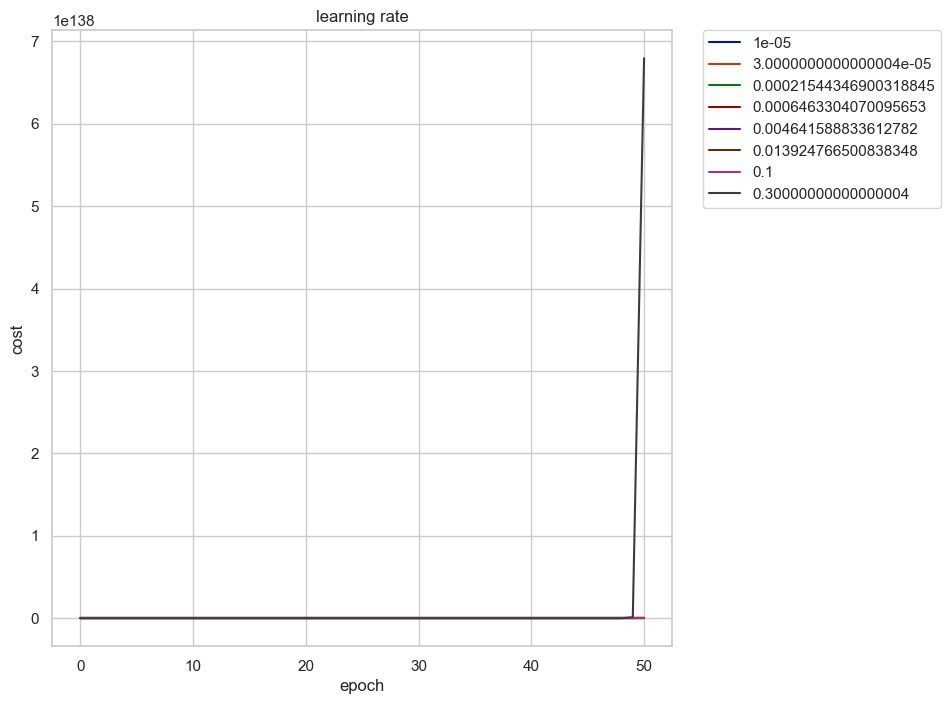

In [42]:
epoch=50

fig, ax = plt.subplots(figsize=(8, 8))

for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    ax.plot(np.arange(epoch+1), cost_data, label=alpha)

ax.set_xlabel('epoch', fontsize=12)
ax.set_ylabel('cost', fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=12)
plt.show()